<a href="https://colab.research.google.com/github/Karlajack/pydata_analysis/blob/main/Pydatacapstoneproject_Worldhappiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geoplot as gplt
import mapclassify as mc
import plotly.express as px

In [5]:
pip install geoplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 60.9 MB/s eta 0:00:00


In [8]:
df2019=pd.read_csv('/content/World Happiness Report 2019.csv')
df2020=pd.read_csv('/content/World Happiness Report 2020.csv')
df2021=pd.read_csv('/content/World Happiness Report 2021.csv')
df2022=pd.read_csv('/content/World Happiness Report 2022.csv')
df2023=pd.read_csv('/content/World Happiness Report 2023.csv')
dfregion=pd.read_csv('/content/Region.csv')
dfregion.head()


,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [9]:
df = pd.concat([df2019,df2020,df2021,df2022,df2023])

df = pd.merge(df , dfregion, on="Country")
df.head()



,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Year,Region
0,Finland,7.7690,1.34000,1.587000,0.986000,0.596000,0.15300,0.393000,2.714000,2019,Western Europe
1,Finland,7.8087,1.28519,1.499526,0.961271,0.662317,0.15967,0.477857,2.762835,2020,Western Europe
2,Finland,7.8420,1.44600,1.106000,0.741000,0.691000,0.12400,0.481000,3.253000,2021,Western Europe
3,Finland,7.8210,1.89200,1.258000,0.775000,0.736000,0.10900,0.534000,2.518000,2022,Western Europe
4,Finland,7.8040,1.88800,1.585000,0.535000,0.772000,0.12600,0.535000,2.363000,2023,Western Europe


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       712 non-null    object 
 1   Happiness Score               712 non-null    float64
 2   GDP per capita                712 non-null    float64
 3   Social support                711 non-null    float64
 4   Healthy life expectancy       711 non-null    float64
 5   Freedom to make life choices  712 non-null    float64
 6   Generosity                    712 non-null    float64
 7   Perceptions of corruption     712 non-null    float64
 8   Dystopia + residual           711 non-null    float64
 9   Year                          712 non-null    int64  
 10  Region                        712 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 61.3+ KB


In [11]:
df.isnull().sum()

Country                         0
Happiness Score                 0
GDP per capita                  0
Social support                  1
Healthy life expectancy         1
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             1
Year                            0
Region                          0
dtype: int64

In [41]:
df['Social support'] = df['Social support'].fillna(df['Social support'].dropna().mean())
df['Healthy life expectancy'] = df['Healthy life expectancy'].fillna(df['Healthy life expectancy'].dropna().mean())
df['Dystopia + residual'] = df['Dystopia + residual'].fillna(df['Dystopia + residual'].dropna().mean())


In [14]:
df.head()

,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Year,Region
0,Finland,7.7690,1.34000,1.587000,0.986000,0.596000,0.15300,0.393000,2.714000,2019,Western Europe
1,Finland,7.8087,1.28519,1.499526,0.961271,0.662317,0.15967,0.477857,2.762835,2020,Western Europe
2,Finland,7.8420,1.44600,1.106000,0.741000,0.691000,0.12400,0.481000,3.253000,2021,Western Europe
3,Finland,7.8210,1.89200,1.258000,0.775000,0.736000,0.10900,0.534000,2.518000,2022,Western Europe
4,Finland,7.8040,1.88800,1.585000,0.535000,0.772000,0.12600,0.535000,2.363000,2023,Western Europe


In [15]:
df['Year'] = df['Year'].astype(str)

df = df.set_index('Year')





<ipython-input-16-4e30236fd8de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Happiness Score", y = "Country", data=df2023_happiest_unhappiest, palette = "coolwarm")


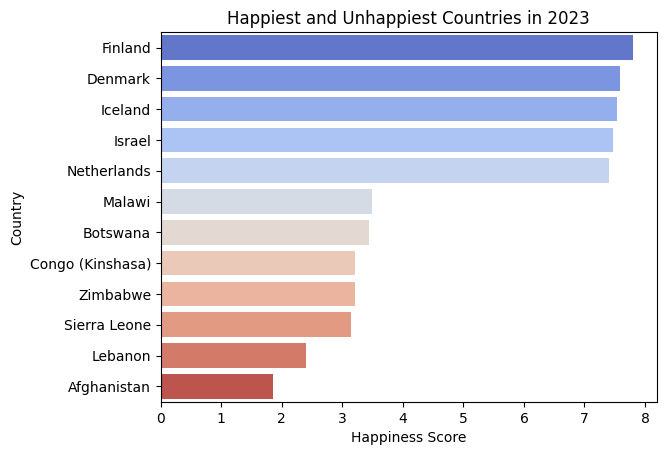

In [16]:
df2023_happiest_unhappiest = df2023[(df2023.loc[:, "Happiness Score"] > 7.4) | (df2023.loc[:, "Happiness Score"] < 3.5)]
sns.barplot(x = "Happiness Score", y = "Country", data=df2023_happiest_unhappiest, palette = "coolwarm")
plt.title("Happiest and Unhappiest Countries in 2023")
plt.show()




In [17]:
df2023_g=df2023.sort_values(by='Generosity',ascending=False)


df2023_g=pd.concat([df2023_g.head(5),df2023_g.tail(5)])
df2023_g


,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Year
83,Indonesia,5.277,1.384,1.169,0.314,0.663,0.422,0.038,1.288,2023
116,Myanmar,4.372,1.032,1.125,0.269,0.460,0.400,0.194,0.893,2023
118,Gambia,4.279,0.761,0.614,0.174,0.286,0.332,0.033,2.081,2023
110,Kenya,4.487,1.051,0.881,0.190,0.418,0.291,0.055,1.601,2023
59,Thailand,5.843,1.515,1.344,0.461,0.624,0.291,0.013,1.594,2023
131,Botswana,3.435,1.471,1.041,0.087,0.480,0.021,0.071,0.264,2023
99,Morocco,4.903,1.236,0.535,0.337,0.540,0.013,0.085,2.158,2023
46,Japan,6.129,1.825,1.396,0.622,0.556,0.009,0.207,1.513,2023
57,Greece,5.931,1.708,1.247,0.535,0.248,0.008,0.097,2.089,2023
89,Georgia,5.109,1.477,0.947,0.366,0.539,0.000,0.201,1.580,2023


<ipython-input-18-c73daa665609>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Generosity", y = "Country", data = df2023_g, palette = "coolwarm")


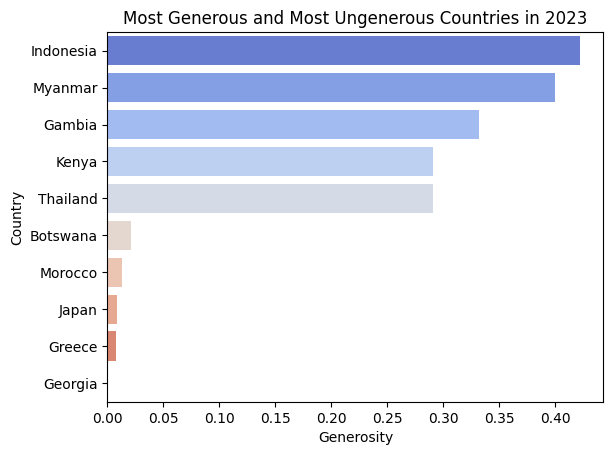

In [18]:
sns.barplot(x = "Generosity", y = "Country", data = df2023_g, palette = "coolwarm")
plt.title("Most Generous and Most Ungenerous Countries in 2023")
plt.show()

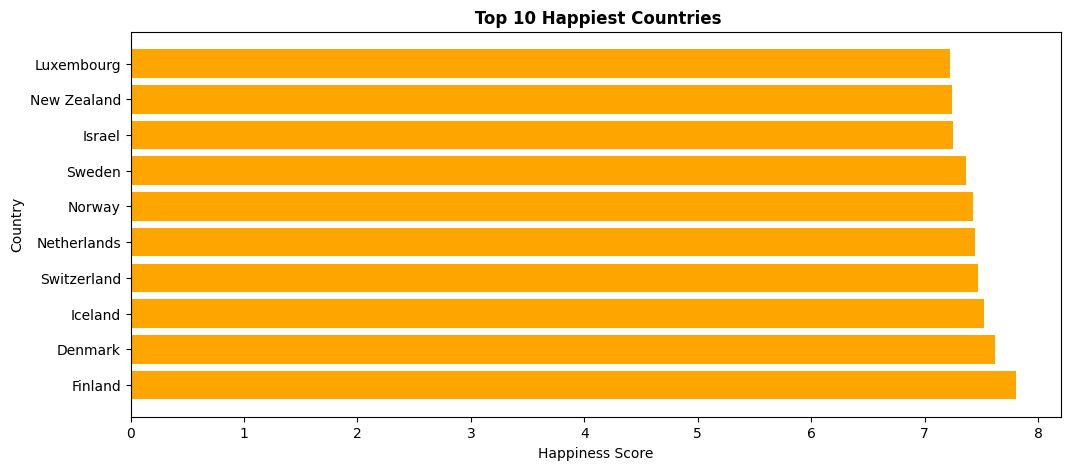

In [19]:
df_h= df.groupby('Country')[['Happiness Score']].mean().sort_values(by='Happiness Score',ascending=False).head(10).reset_index()
plt.figure(figsize=(12,5))
Country=df_h['Country']
values=df_h['Happiness Score']
plt.barh(Country, values,color='Orange')
plt.title(" Top 10 Happiest Countries",fontsize=12,fontweight='bold')
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

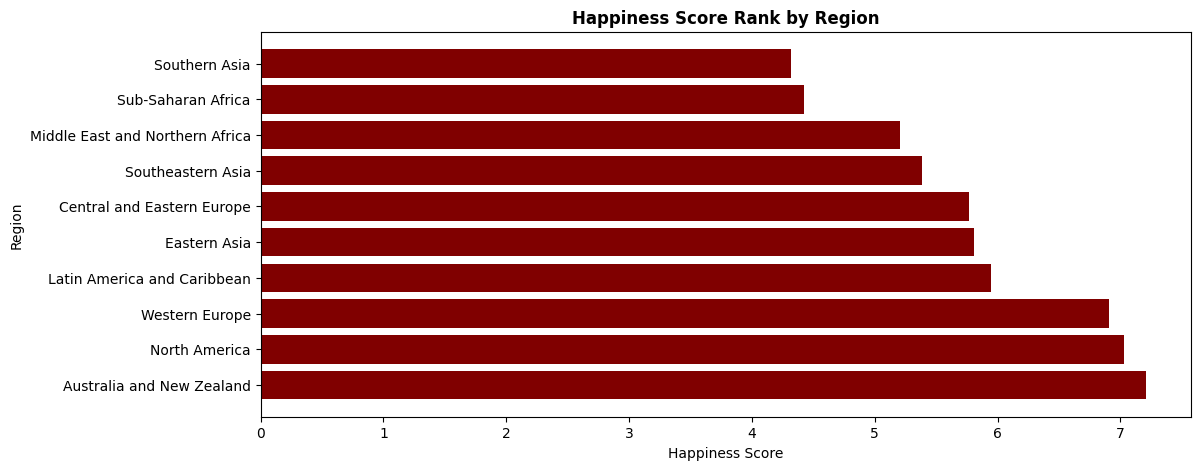

In [44]:
df_h= df.groupby('Region')[['Happiness Score']].mean().sort_values(by='Happiness Score',ascending=False).reset_index()
plt.figure(figsize=(12,5))
Region=df_h['Region']
values=df_h['Happiness Score']
plt.barh(Region, values,color='Maroon')
plt.title("Happiness Score Rank by Region",fontsize=12,fontweight='bold')
plt.xlabel("Happiness Score")
plt.ylabel("Region")
plt.show()

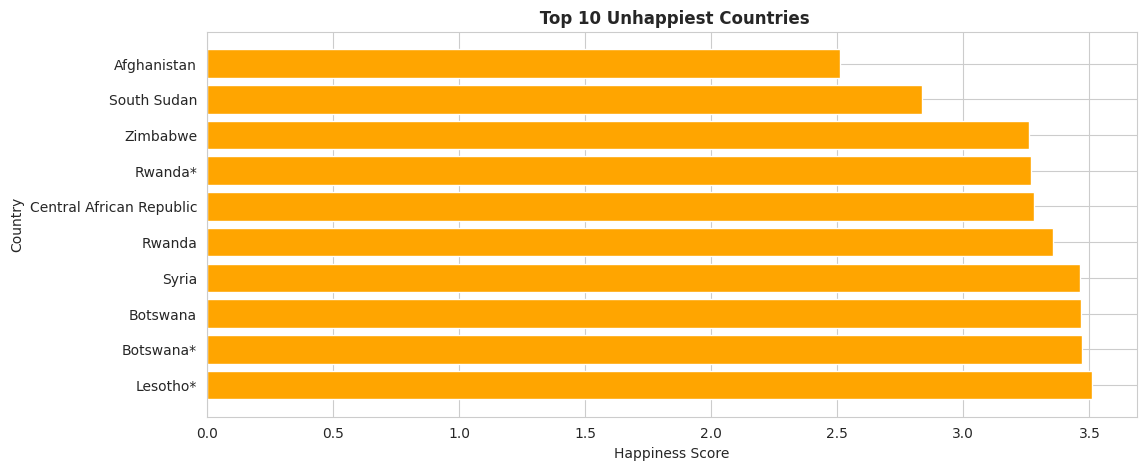

In [ ]:
df_h= df.groupby('Country')[['Happiness Score']].mean().sort_values(by='Happiness Score',ascending=False).tail(10).reset_index()
plt.figure(figsize=(12,5))
sns.set_style("whitegrid")
Country=df_h['Country']
values=df_h['Happiness Score']
plt.barh(Country, values,color='Orange')
plt.title(" Top 10 Unhappiest Countries",fontsize=12,fontweight='bold')
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

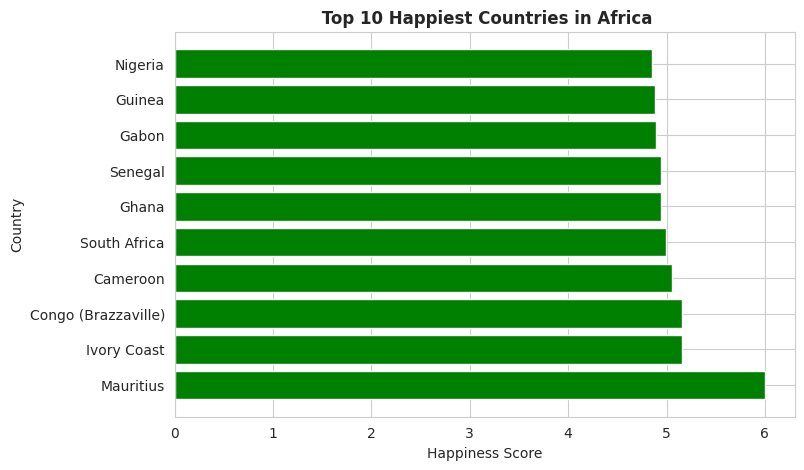

In [110]:
df_hy= df.groupby(['Country','Region'])[['Happiness Score']].mean().sort_values(by='Happiness Score',ascending=False).reset_index()
df_hf=df_hy[df_hy['Region'].isin(['Sub-Saharan Africa'])].head(10)
df_hf
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
Country=df_hf['Country']
values=df_hf['Happiness Score']
plt.barh(Country, values,color='Green')
plt.title(" Top 10 Happiest Countries in Africa",fontsize=12,fontweight='bold')
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()




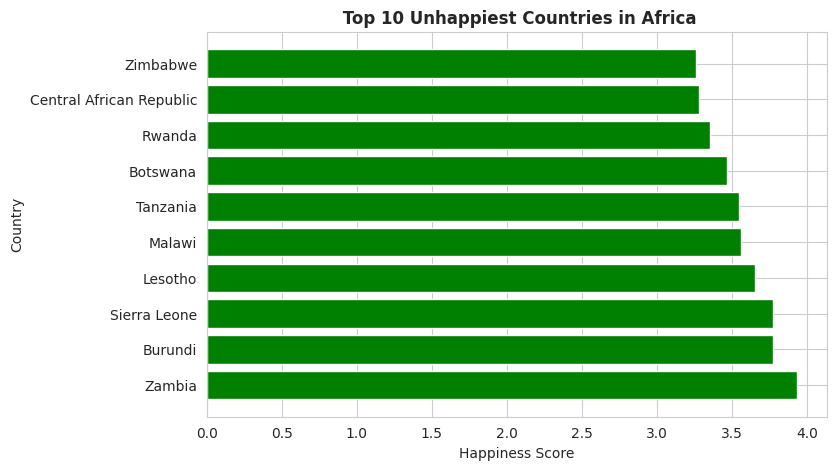

In [112]:
df_hy= df.groupby(['Country','Region'])[['Happiness Score']].mean().sort_values(by='Happiness Score',ascending=False).reset_index()
df_hf=df_hy[df_hy['Region'].isin(['Sub-Saharan Africa'])].tail(10)
df_hf
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
Country=df_hf['Country']
values=df_hf['Happiness Score']
plt.barh(Country, values,color='Green')
plt.title(" Top 10 Unhappiest Countries in Africa",fontsize=12,fontweight='bold')
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

In [ ]:
df_h= df.groupby('Country')[['Happiness Score']].mean().sort_values(by='Happiness Score',ascending=False).head(10).reset_index()
plt.figure(figsize=(12,5))
Country=df_h['Country']
values=df_h['Happiness Score']
plt.barh(Country, values,color='Orange')
plt.title(" Top 10 Happiest Countries",fontsize=12,fontweight='bold')
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

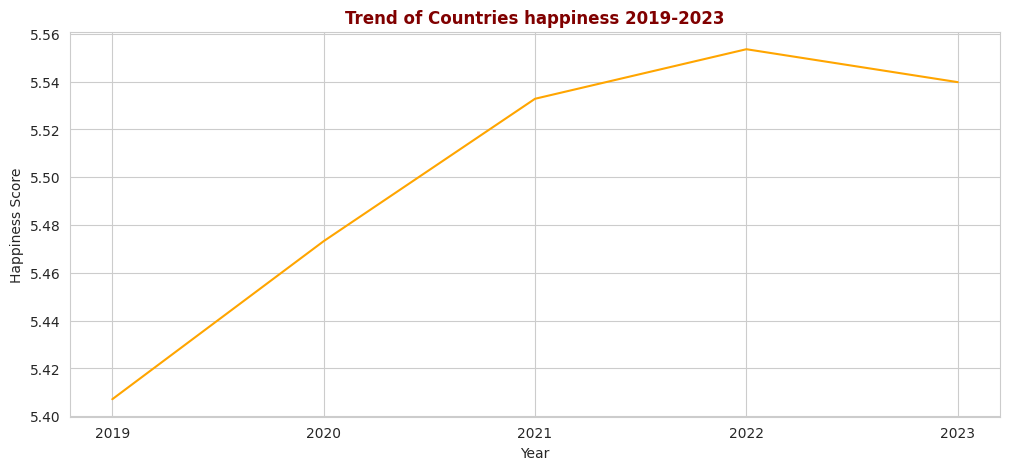

In [ ]:

df_hy= df.groupby('Year')[['Happiness Score']].mean().sort_values(by='Year',ascending=True).reset_index()
df_hy
plt.figure(figsize=(12,5))
x=df_hy['Year']
y=df_hy['Happiness Score']
plt.plot(x,y,color='Orange')
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Trend of Countries happiness 2019-2023",fontsize=12,fontweight='bold',color='Maroon')
plt.show()


In [61]:
df_hy1=df_hy['Region']
df_hy1.unique()



array(['Australia and New Zealand', 'Central and Eastern Europe',
       'Eastern Asia', 'Latin America and Caribbean',
       'Middle East and Northern Africa', 'North America',
       'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa',
       'Western Europe'], dtype=object)

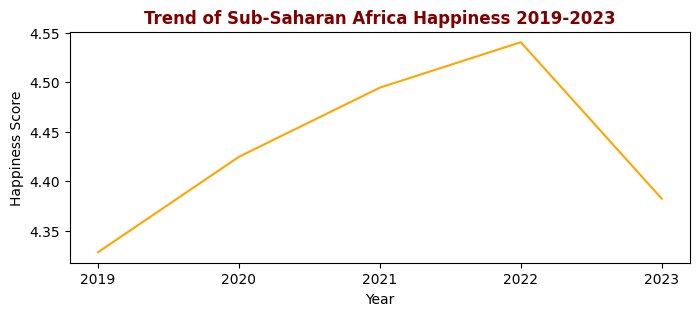

In [92]:
df_hy= df.groupby(['Year','Region'])[['Happiness Score']].mean().sort_values(by=['Year','Region','Happiness Score'],ascending=True).reset_index()
df_hy1=df_hy[df_hy['Region'].isin(['Sub-Saharan Africa'])]
df_hy1
plt.figure(figsize=(8,3))
x=df_hy1['Year']
y=df_hy1['Happiness Score']
plt.plot(x,y,color='Orange')
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Trend of Sub-Saharan Africa Happiness 2019-2023",fontsize=12,fontweight='bold',color='Maroon')
plt.show()



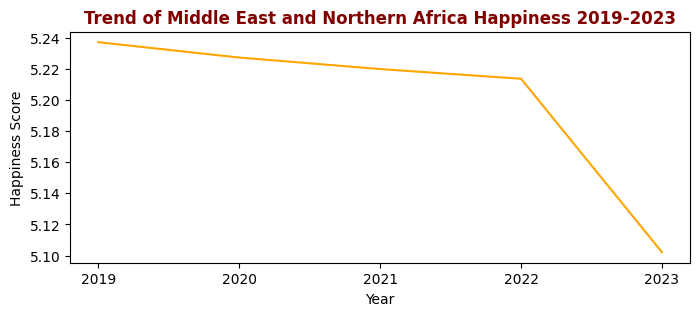

In [98]:
df_hy2=df_hy[df_hy['Region'].isin(['Middle East and Northern Africa'])]
df_hy2
plt.figure(figsize=(8,3))
x=df_hy2['Year']
y=df_hy2['Happiness Score']
plt.plot(x,y,color='Orange')
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Trend of Middle East and Northern Africa Happiness 2019-2023",fontsize=12,fontweight='bold',color='Maroon')
plt.show()

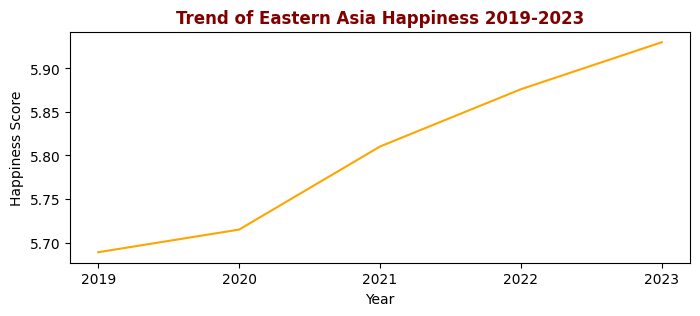

In [95]:

df_hy3=df_hy[df_hy['Region'].isin(['Eastern Asia'])]
df_hy3
plt.figure(figsize=(8,3))
x=df_hy3['Year']
y=df_hy3['Happiness Score']
plt.plot(x,y,color='Orange')
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Trend of Eastern Asia Happiness 2019-2023",fontsize=12,fontweight='bold',color='Maroon')
plt.show()

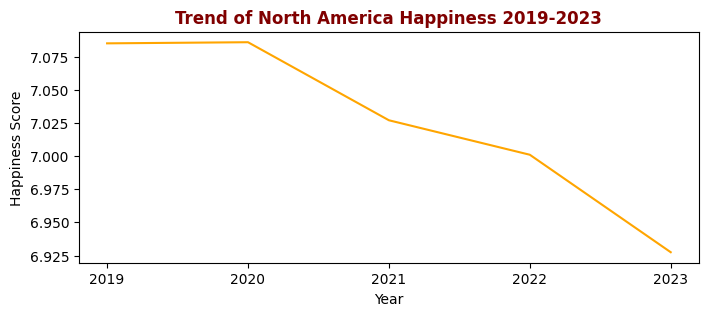

In [96]:

df_hy4=df_hy[df_hy['Region'].isin(['North America'])]
df_hy4
plt.figure(figsize=(8,3))
x=df_hy4['Year']
y=df_hy4['Happiness Score']
plt.plot(x,y,color='Orange')
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Trend of North America Happiness 2019-2023",fontsize=12,fontweight='bold',color='Maroon')
plt.show()

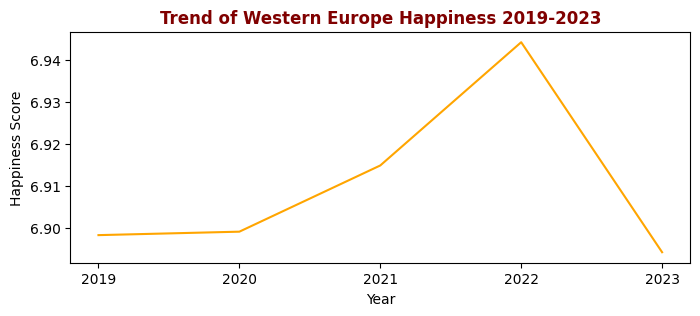

In [97]:
df_hy5=df_hy[df_hy['Region'].isin(['Western Europe'])]
df_hy5
plt.figure(figsize=(8,3))
x=df_hy5['Year']
y=df_hy5['Happiness Score']
plt.plot(x,y,color='Orange')
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Trend of Western Europe Happiness 2019-2023",fontsize=12,fontweight='bold',color='Maroon')
plt.show()

In [ ]:
df.head()

,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Year,,,,,,,,,
2019,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.714
2019,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.394
2019,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.241
2019,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2.401
2019,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.394


In [25]:
df.head(1)

,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Region
Year,,,,,,,,,,
2019,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393,2.714,Western Europe


In [26]:
df_ha= df.groupby(['Region','Country','Year']).mean().reset_index()
df_ha.head(1)

,Region,Country,Year,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Australia and New Zealand,Australia,2019,7.228,1.372,1.548,1.036,0.557,0.332,0.29,2.093


In [28]:
df_hd= df.groupby(['Country','Region','Year']).mean().reset_index()
df.hd1=df_hd.drop(['Country','Region'],axis=1)
df.hd2=df.hd1.groupby(['Year']).mean().reset_index()
df.hd2





,Year,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,2019,5.421553,0.910546,1.214296,0.729079,0.393197,0.184309,0.109967,1.880158
1,2020,5.492659,0.872153,1.154681,0.694607,0.465658,0.189008,0.131237,1.982033
2,2021,5.535101,0.976230,0.791818,0.518966,0.498196,0.177872,0.135561,2.436480
3,2022,5.667274,1.453476,0.923847,0.610581,0.530347,0.150323,0.152726,1.846081
4,2023,5.539796,1.406985,1.156212,0.367795,0.540000,0.148474,0.145898,1.779402


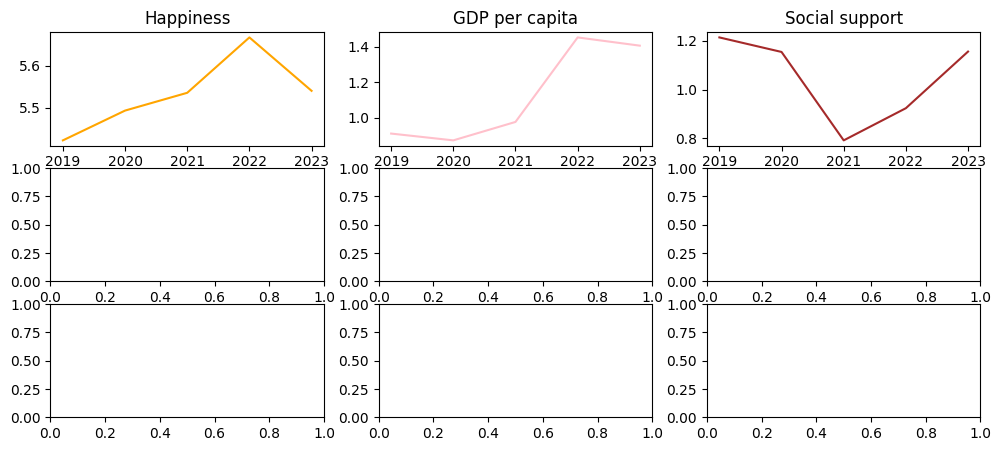

In [34]:
x=df.hd2['Year']
y=df.hd2['Happiness Score']
z=df.hd2['GDP per capita']
R=df.hd2['Social support']


fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(12,5))

ax[0,0].plot(x,y,label='Happiness Score',color='Orange')
ax[0,1].plot(x,z,label='GDP per capita',color='Pink')
ax[0,2].plot(x,R,label='Social support',color='Brown')

ax[0,0].set_title('Happiness')
ax[0,1].set_title('GDP per capita')
ax[0,2].set_title('Social support')

plt.show()

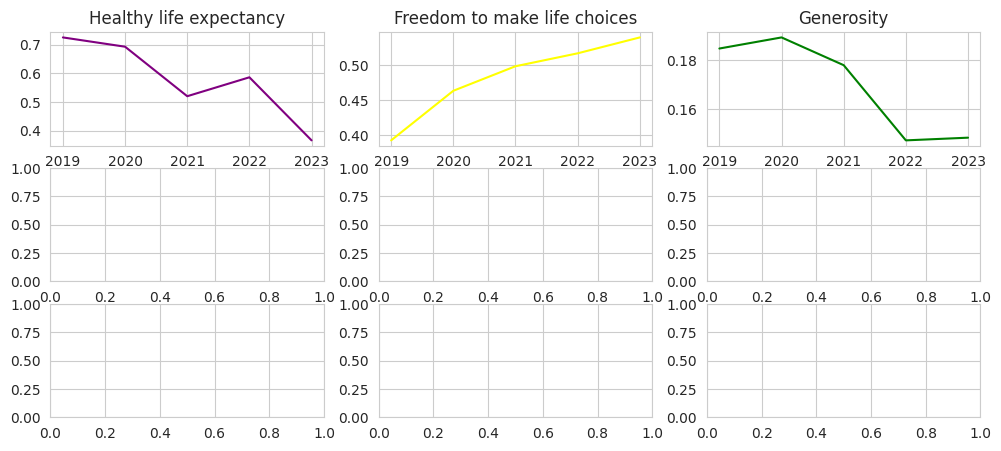

In [ ]:
x=df.hd2['Year']

S=df.hd2['Healthy life expectancy']
T=df.hd2['Freedom to make life choices']
U=df.hd2['Generosity']


fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(12,5))


ax[0,0].plot(x,S,label='Healthy life expectancy',color='Purple')
ax[0,1].plot(x,T,label='Freedom to make life choices',color='Yellow')
ax[0,2].plot(x,U,label='Generosity',color='Green')


ax[0,0].set_title('Healthy life expectancy')
ax[0,1].set_title('Freedom to make life choices')
ax[0,2].set_title('Generosity')


plt.show()

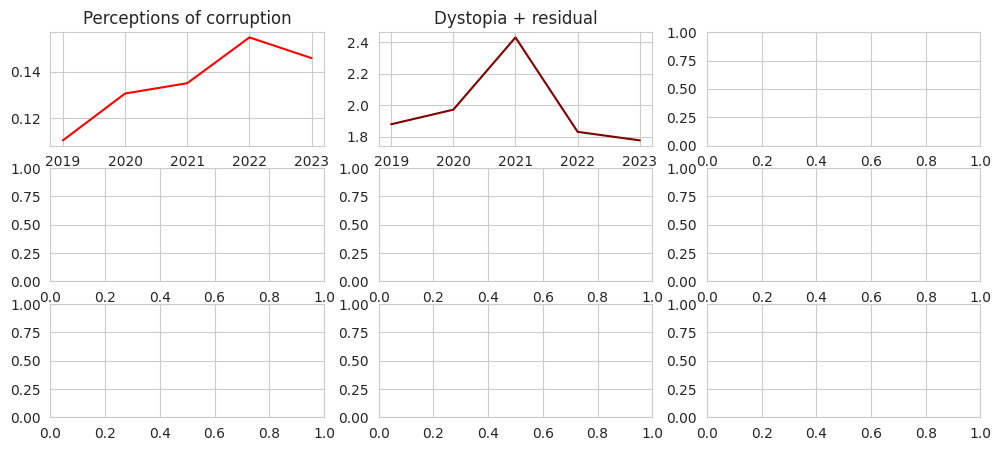

In [ ]:
x=df.hd2['Year']

V=df.hd2['Perceptions of corruption']
W=df.hd2['Dystopia + residual']

fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(12,5))

ax[0,0].plot(x,V,label='Perceptions of corruption',color='Red')
ax[0,1].plot(x,W,label='Dystopia + residual',color='Maroon')



ax[0,0].set_title('Perceptions of corruption')
ax[0,1].set_title('Dystopia + residual')

plt.show()

In [ ]:
df.hd2


,Year,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,2019,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603,1.879872
1,2020,5.473240,0.868771,1.153028,0.692869,0.463583,0.189375,0.130718,1.972317
2,2021,5.532839,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
3,2022,5.553575,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781,1.831808
4,2023,5.539796,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898,1.777838


In [ ]:
df.hd3=df.hd2.drop('Year',axis=1)
df.hd4=df.hd3.mean().reset_index()
df.hd4
df.hd5= df.hd4.rename(columns={df.hd4.columns[0]:'Category',df.hd4.columns[1]:'Score'})
df.hd5=df.hd5.sort_values(by='Score',ascending=False)

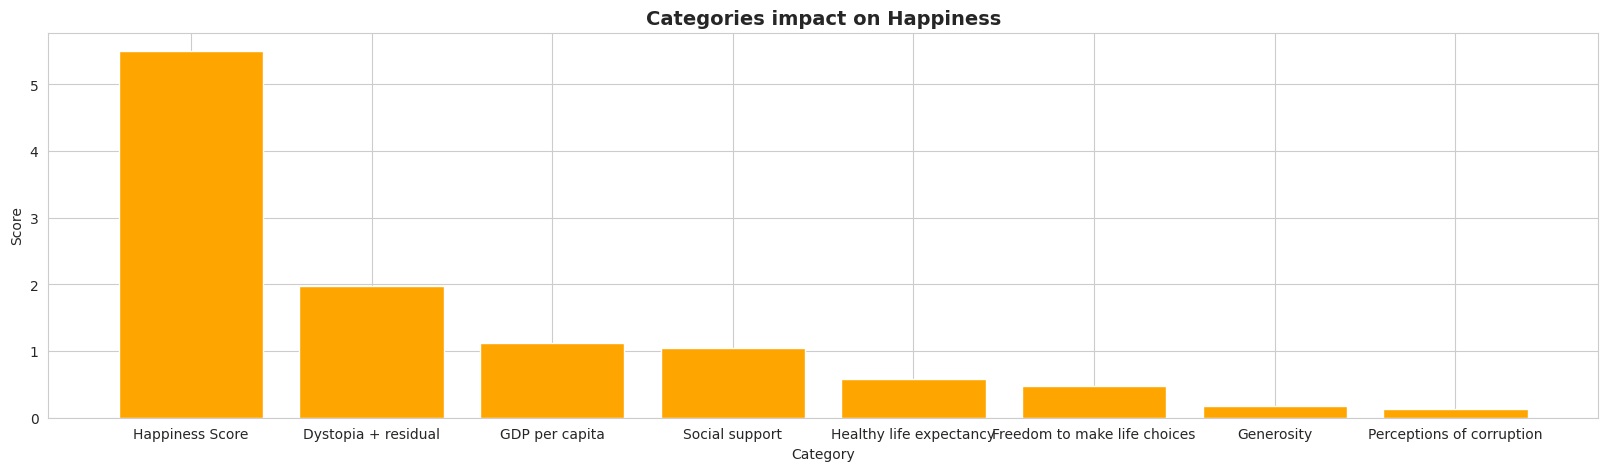

In [ ]:
plt.figure(figsize=(20,5))
Categories=df.hd5['Category']
values=df.hd5['Score']
plt.bar(Categories, values,color='Orange')
plt.title("Categories impact on Happiness",fontsize=14,fontweight='bold')
plt.xlabel("Category")
plt.ylabel("Score")
plt.show()

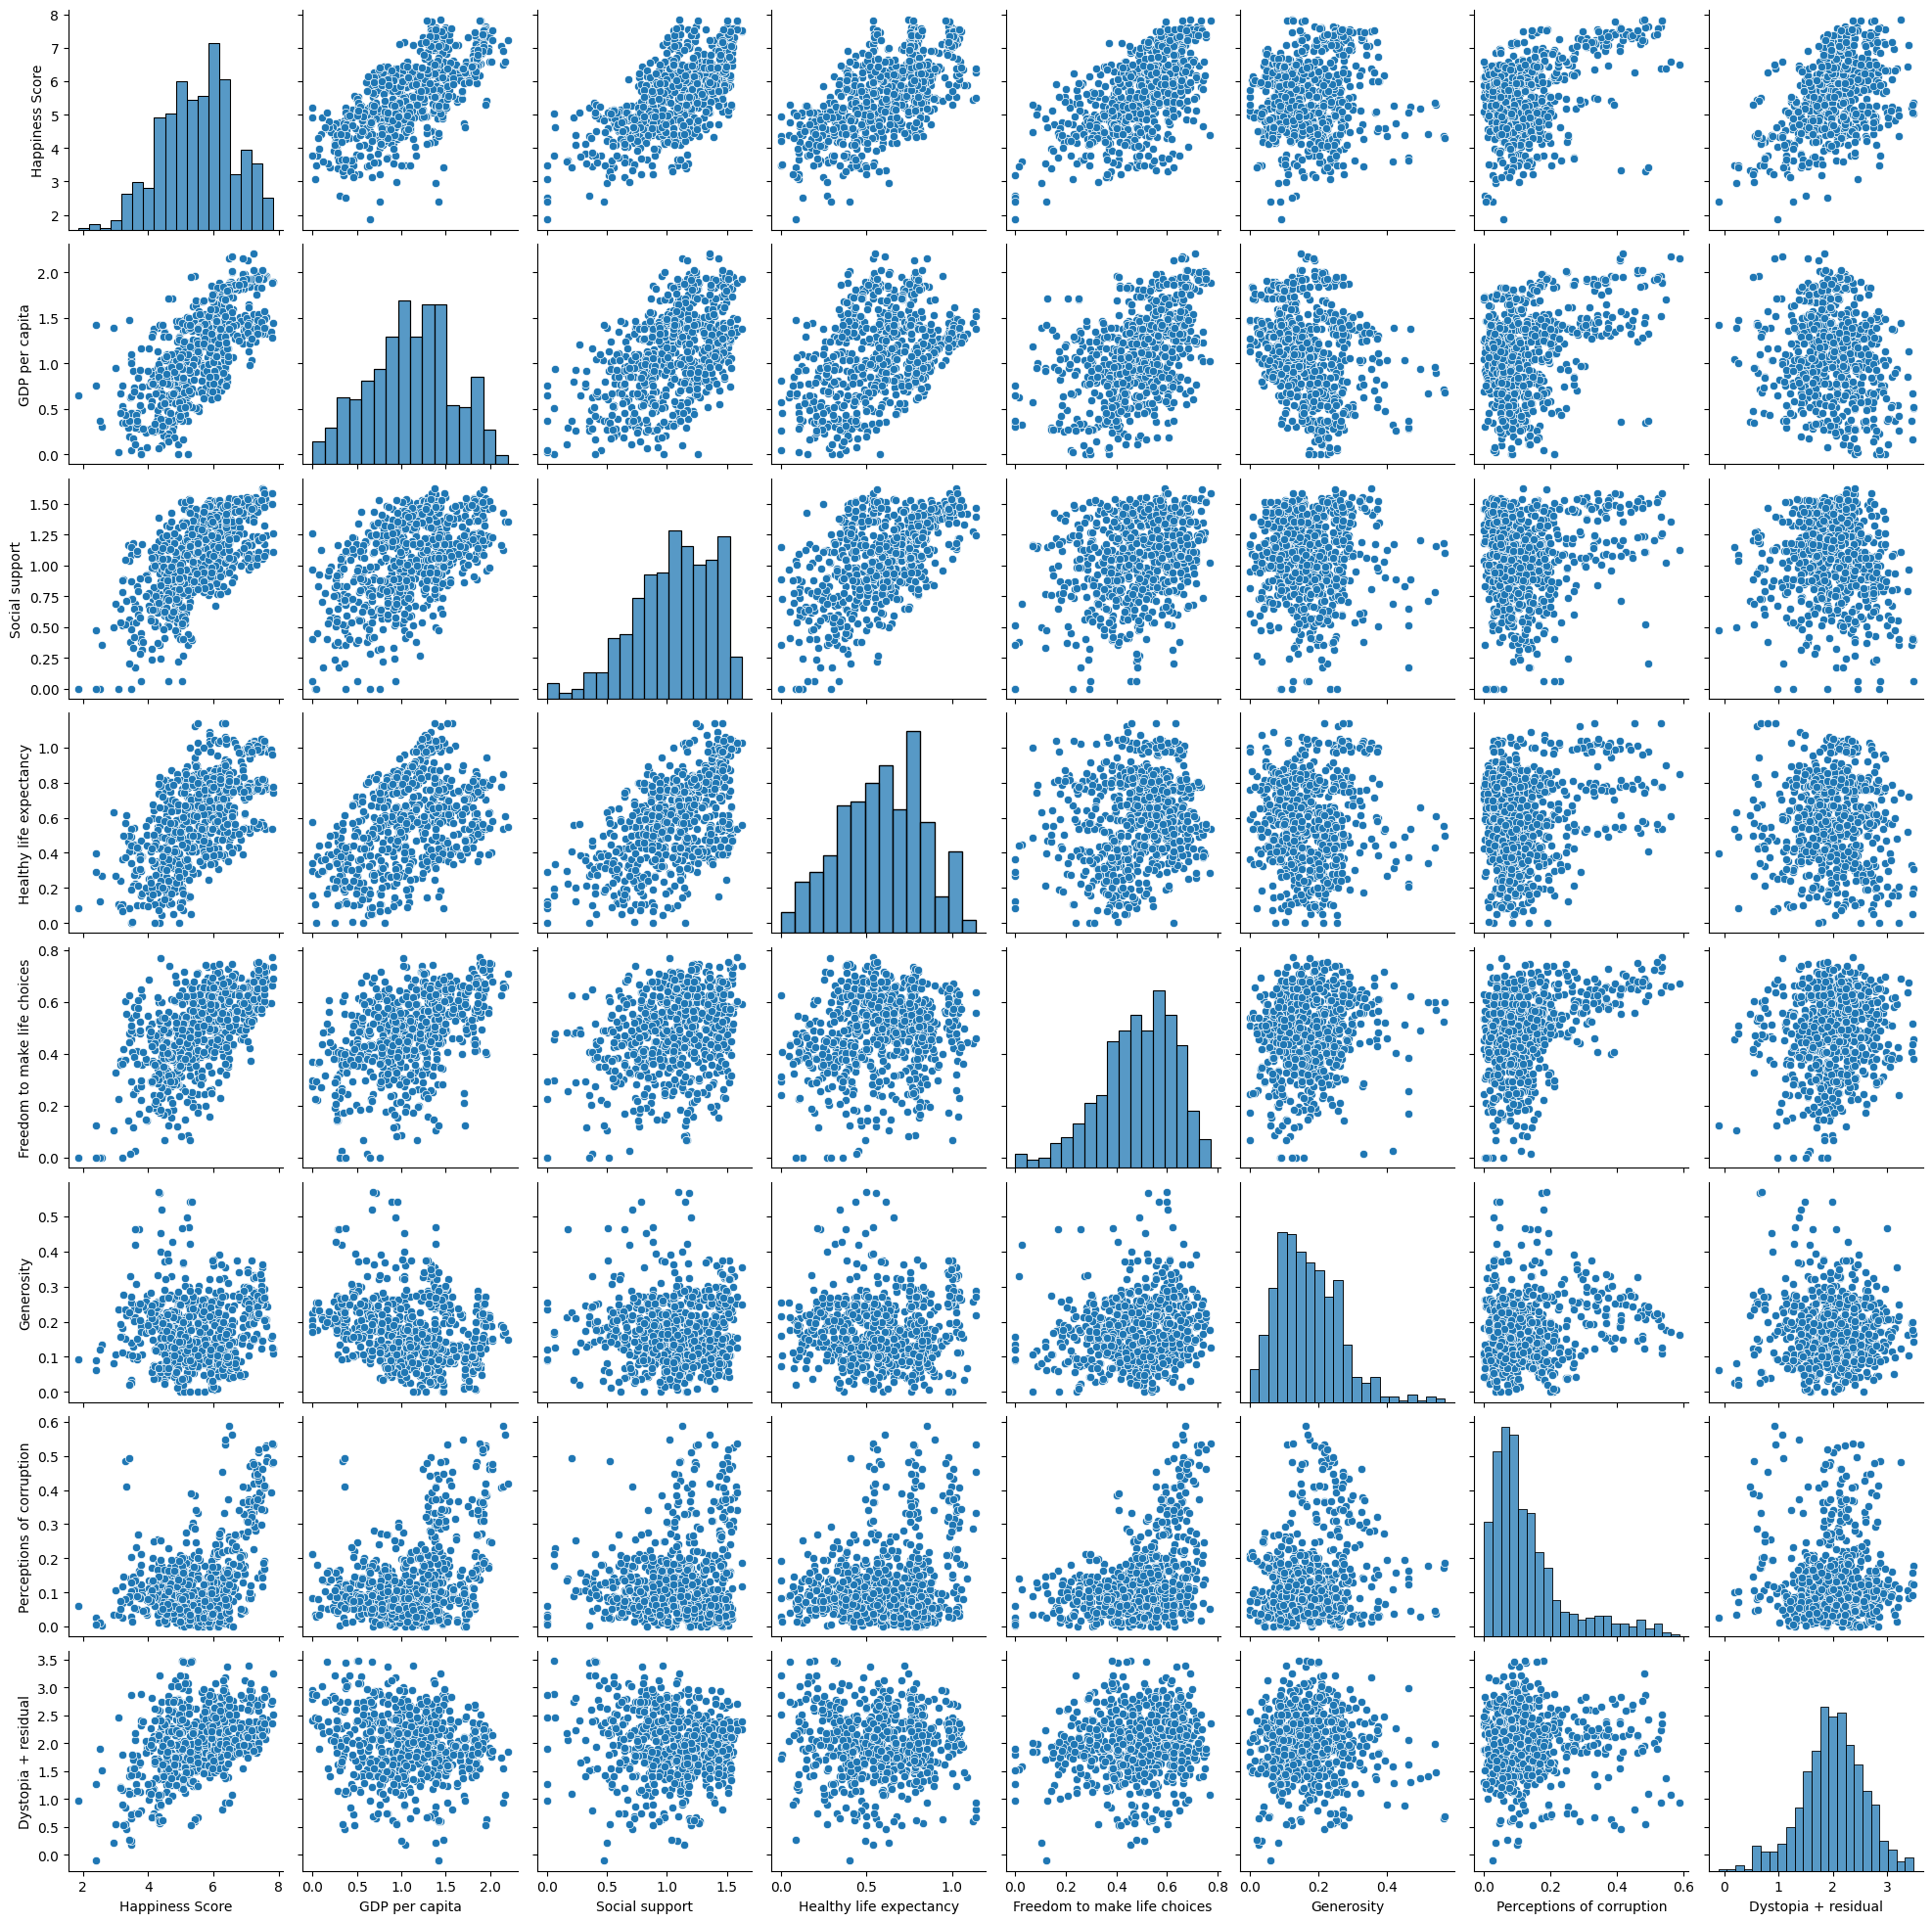

In [36]:
sns.pairplot(df_ha)

In [ ]:
df_h2= df.groupby(['Country','Year'])[['Happiness Score']].mean().sort_values(by='Happiness Score',ascending=False).head(15).reset_index()
df_h2

,Country,Year,Happiness Score
0,Finland,2021,7.8420
1,Finland,2022,7.8210
2,Finland,2020,7.8087
3,Finland,2023,7.8040
4,Finland,2019,7.7690
5,Denmark,2020,7.6456
6,Denmark,2022,7.6360
7,Denmark,2021,7.6200
8,Denmark,2019,7.6000
9,Denmark,2023,7.5860


In [ ]:
happiness_pivot = df_h2.pivot_table(values='Happiness Score', index='Country', columns='Year')

# Create a bar chart of happiness score by region, clustered by year
fig = px.bar(happiness_pivot, barmode='group')

fig.update_layout(title='Top Happiness Score by Country between 2019-2023, Clustered by Year',
                  xaxis_title='Country',
                  yaxis_title='Happiness Score',
                  legend_title='Year')

fig.update_traces(hovertemplate='Country: %{x}<br>Year: %{customdata[0]}<br>Happiness Score: %{y}')

fig.show()

KeyError: 'Happiness Score'

In [ ]:
df_h3= df.groupby(['Country','Year'])[['Happiness Score']].mean().sort_values(by='Happiness Score',ascending=False).tail(15).reset_index()
df_h3

,Country,Year,Happiness Score
0,Congo (Kinshasa),2023,3.2070
1,Zimbabwe,2023,3.2040
2,Afghanistan,2019,3.2030
3,Zimbabwe,2021,3.1450
4,Sierra Leone,2023,3.1380
5,Central African Republic,2019,3.0830
6,Zimbabwe,2022,2.9950
7,Lebanon,2022,2.9550
8,South Sudan,2019,2.8530
9,South Sudan,2020,2.8166


In [ ]:
happiness_pivot = df_h3.pivot_table(values='Happiness Score', index='Country', columns='Year')

# Create a bar chart of happiness score by region, clustered by year
fig = px.bar(happiness_pivot, barmode='group')

fig.update_layout(title='Lowest Happiness Score by Country between 2019-2023, Clustered by Year',
                  xaxis_title='Country',
                  yaxis_title='Happiness Score',
                  legend_title='Year')

fig.update_traces(hovertemplate='Country: %{x}<br>Year: %{customdata[0]}<br>Happiness Score: %{y}')

fig.show()

In [ ]:
df.head(1)

,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Year,,,,,,,,,
2019,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393,2.714


In [ ]:
df_h7= df.groupby(['Country','Year'])[['Healthy life expectancy']].mean().sort_values(by='Healthy life expectancy',ascending=False).head(15).reset_index()
df_h7

,Country,Year,Healthy life expectancy
0,Singapore,2019,1.141000
1,Singapore,2020,1.137814
2,Hong Kong S.A.R. of China,2020,1.136631
3,Hong Kong,2019,1.122000
4,Japan,2019,1.088000
5,Japan,2020,1.072881
6,Spain,2019,1.062000
7,Switzerland,2019,1.052000
8,Spain,2020,1.051343
9,France,2019,1.045000


In [ ]:
happiness_pivot = df_h5.pivot_table(values='GDP per capita', index='Country', columns='Year')

# Create a bar chart of happiness score by region, clustered by year
fig = px.bar(happiness_pivot, barmode='group')

fig.update_layout(title='Top GDP per capita Score by Country between 2019-2023, Clustered by Year',
                  xaxis_title='Country',
                  yaxis_title='GDP per capita',
                  legend_title='Year')

fig.update_traces(hovertemplate='Country: %{x}<br>Year: %{customdata[0]}<br>Happiness Score: %{y}')

fig.show()

In [ ]:
happiness_pivot = df_h6.pivot_table(values='GDP per capita', index='Country', columns='Year')

# Create a bar chart of happiness score by region, clustered by year
fig = px.bar(happiness_pivot, barmode='group')

fig.update_layout(title='Lowest GDP per capita Score by Country between 2019-2023, Clustered by Year',
                  xaxis_title='Country',
                  yaxis_title='GDP per capita',
                  legend_title='Year')

fig.update_traces(hovertemplate='Country: %{x}<br>Year: %{customdata[0]}<br>Happiness Score: %{y}')

fig.show()

In [ ]:
happiness_pivot = df_h7.pivot_table(values='Healthy life expectancy', index='Country', columns='Year')

# Create a bar chart of happiness score by region, clustered by year
fig = px.bar(happiness_pivot, barmode='group')

fig.update_layout(title='Lowest Healthy life expectancy by Country between 2019-2023, Clustered by Year',
                  xaxis_title='Country',
                  yaxis_title='Healthy life expectancy',
                  legend_title='Year')

fig.update_traces(hovertemplate='Country: %{x}<br>Year: %{customdata[0]}<br>Happiness Score: %{y}')

fig.show()

In [ ]:
happiness_pivot = df_h7.pivot_table(values='Healthy life expectancy', index='Country', columns='Year')

# Create a bar chart of happiness score by region, clustered by year
fig = px.bar(happiness_pivot, barmode='group')

fig.update_layout(title='Highest Healthy life expectancy by Country between 2019-2023, Clustered by Year',
                  xaxis_title='Country',
                  yaxis_title='Healthy life expectancy',
                  legend_title='Year')

fig.update_traces(hovertemplate='Country: %{x}<br>Year: %{customdata[0]}<br>Happiness Score: %{y}')

fig.show()

In [ ]:
df_hw= df.groupby('Country').mean().sort_values(by='Country',ascending=True).reset_index()
df_hw


,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Afghanistan,2.51118,0.484741,0.174687,0.225810,0.000000,0.119447,0.020045,1.486647
1,Albania,5.03894,1.149931,0.760897,0.713066,0.479189,0.157606,0.028272,1.749779
2,Algeria,5.11082,1.121571,1.067201,0.626884,0.137389,0.102983,0.133038,1.921762
3,Argentina,5.99614,1.292893,1.254909,0.693155,0.535568,0.074820,0.068883,2.075908
4,Armenia,5.05196,1.110852,0.960315,0.657371,0.462015,0.077645,0.147324,1.636032
...,...,...,...,...,...,...,...,...,...
182,Vietnam,5.43750,0.975418,1.123215,0.655627,0.664167,0.136898,0.096170,1.785996
183,Yemen,3.52180,0.336234,1.057159,0.383333,0.218240,0.098230,0.084451,1.343824
184,Yemen*,4.19700,0.691000,1.043000,0.384000,0.330000,0.090000,0.098000,1.561000
185,Zambia,3.93628,0.697367,0.794607,0.284319,0.495864,0.223324,0.082141,1.358868


In [ ]:
fig = px.choropleth(
   df_hw,
    locations="Country",
    locationmode="country names",
    color="Happiness Score",
    color_continuous_scale="Viridis",
    title="Mapping of Happiness Score by Country",
    labels={"Happiness Score": "Happiness Score"},
    hover_name="Country",
    hover_data={
        "Social support": True,
        "Healthy life expectancy": True,
         "GDP per capita": True,
         "Freedom to make life choices": True,
        "Perceptions of corruption": True,
         "Dystopia + residual": True

    },
    projection="natural earth"
)

fig.update_geos(showcoastlines=True, coastlinecolor="black", showland=True, landcolor="white")

fig.show()